# Finding Heavy Traffic Indicators on I-94

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

The goal of this analysis is to determine a few indicate of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, and so on. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head(5) #Reading the first 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5) #Reading the last 5 rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 1. Analyzing Traffic Volume

### 1.1. Initial Observations

<AxesSubplot:ylabel='Frequency'>

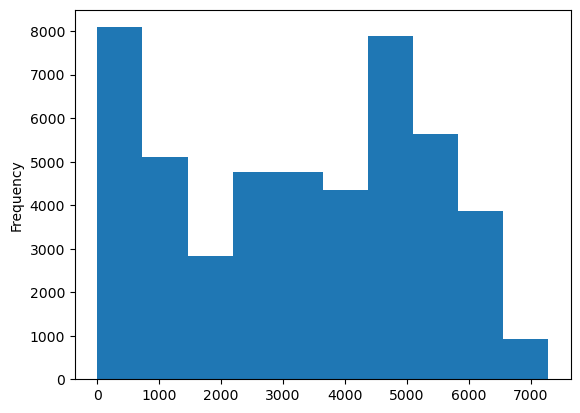

In [5]:
traffic['traffic_volume'].plot.hist()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- Nearly 25% of the time, around 1,193 cars pass through the station each hour. This could most probably occur during the night. 
- And about 75% of the time, almost 4 times of 1,193 cars pass through at nighttime. Further examination of day and night influence on traffic volume could give new insights.

### 1.2. Day vs. Night 

We will start by dividing the dataset in two parts:
1. Daytime: 7 a.m - 7 p.m (12 hours)
2. Nightime 7 p.m - 7 a.m (12 hours)

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [9]:
daytime = traffic.copy() [traffic['date_time'].dt.hour.between(7,19)]
nighttime = traffic.copy()[(traffic['date_time'].dt.hour <= 19) & (traffic['date_time'].dt.hour < 7)]


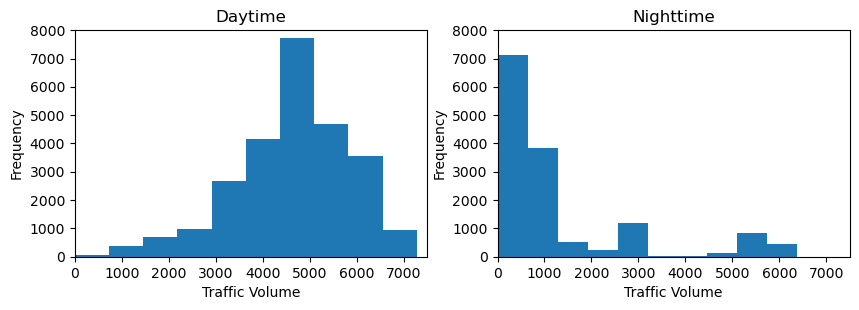

In [10]:
plt.figure(figsize = (10,10))

#Daytime
plt.subplot(3,2,1)
plt.title('Daytime')
daytime['traffic_volume'].plot.hist()
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.xlabel('Traffic Volume')

#Nighttime
plt.subplot(3,2,2)
plt.title('Nighttime')
nighttime['traffic_volume'].plot.hist()
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.xlabel('Traffic Volume')

plt.show()


The daytime distribution is left skewed and the nighttime distribution is right skewed. The distribution of daytime traffic volume indicates that the traffic volume is rising, while it is decreasing for nighttime.

From this, we can say that the traffic is relatively light around night. Since our goal is to find indicators of heavy traffic, we will be using the daytime dataframe from here

## 2. Time Indicators

### 2.1 Month on Average

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or a certain time.

We can look at a few line plots showing how the traffic volume changed according to the following parameters:
1. Month
2. Day of the week
3. Time of the day

In [11]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Frequency')

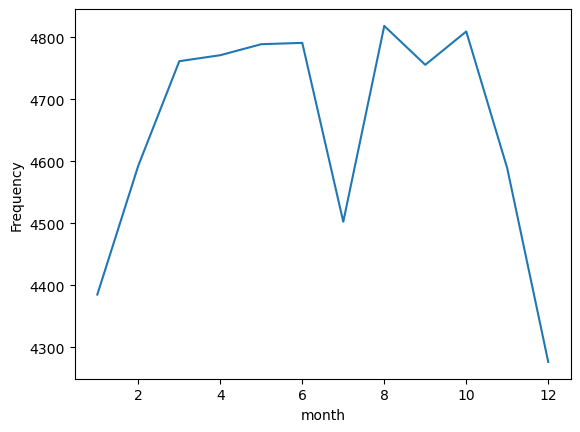

In [12]:
by_month['traffic_volume'].plot.line()
plt.ylabel('Frequency')

From the plot, we can deduce the following:
- There is a steady increase from January to March
- The traffic is high but nearly constant from March to June
- There is a sudden drop in traffic volume from June to July; and an equivalent increase from July to September.
- Small fluctuation from September to November.
- Steady decrease from November to December.

### 2.2 Day of the Week

In [13]:
#Traffic volume average for each day of the week
daytime['day_of_week'] = daytime['date_time'].dt.day_of_week
by_dayofweek = daytime.groupby('day_of_week').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Frequency')

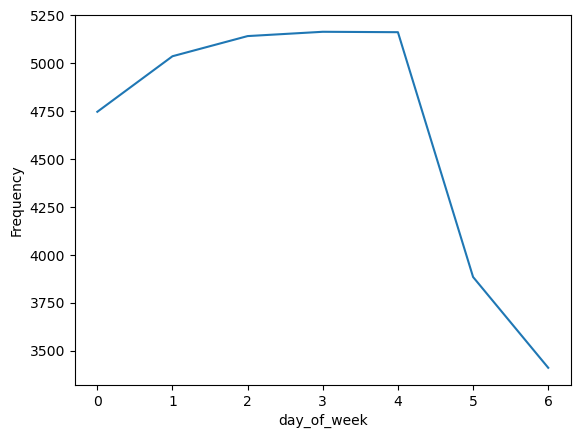

In [14]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Frequency')

From the graph, we can infer the following:
1. The traffic volume is high, but stable during the week days.
2. From Friday, there is a linear decrease during the weekends.

It's interesting to note that the traffic is high during the business days in comparison to the weekends.

### 2.3 Time of the Day

We will now generate a line plot for the time of day. The weekends, however, will drag down the mean values, so we are going to look at the averages separately. To do so, we shall split the data based on the day type: business day or weekend.

In [15]:
# Splitting the days

daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['day_of_week'] <= 4] # 4 is Friday
weekend = daytime.copy()[daytime['day_of_week'].between(5,6)] # 5 is Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64

In [16]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64

(1500.0, 6500.0)

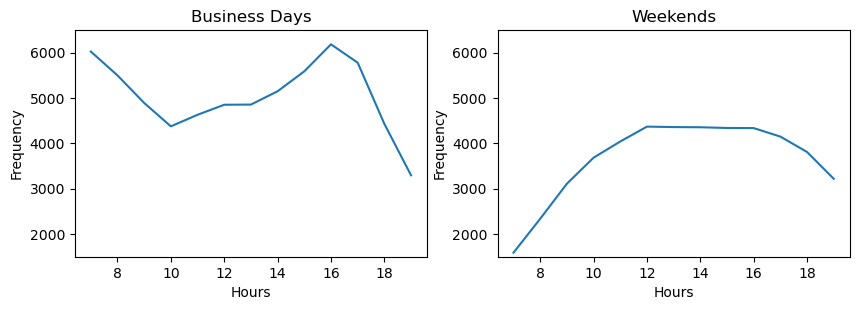

In [77]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business Days')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.ylim([1500, 6500])

plt.subplot(3,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.ylim([1500, 6500])

#plt.show()

- On business days, the plot hits a peak around 7 a.m and 4 p.m.
- On weekends, there is little traffic in the morning which rises linearly and comes to a maximum at 1 p.m. From 1 p.m, the traffic maintains that peak till 4 p.m
- Overall, the traffic on weekends does not reach as high as it does on business days

## 3.Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns on weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

### 3.1 Temperature

From these, we will first analyze the numerical columns, that is, temp, rain_1h, snow_1h, and clouds all.

In [29]:
# Correlation between traffic volume and numeric weather columns
correlation = traffic.corr()['traffic_volume'][['temp','rain_1h','snow_1h','clouds_all']]
print(correlation)

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64


It can be seen that temp has the strongest correlation with traffic volume. We can analyze it further with the help of a scatter plot

(230.0, 330.0)

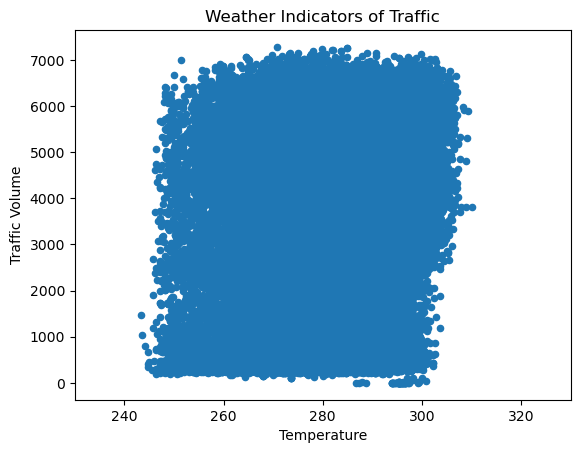

In [56]:
traffic.plot.scatter(x = 'temp', y = 'traffic_volume')
plt.title('Weather Indicators of Traffic')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.xlim([230,330])

### 3.2 Weather Types

The graph seems to indicate that traffic is high when the temperature is mild. However, this does not give us any reliable indicator.

Next, we will look at the categorical weather-related columns: weather_main and weather_description

We are going to calculate the mean traffic volume associated with each unique values in these two columns.

(500.0, 5500.0)

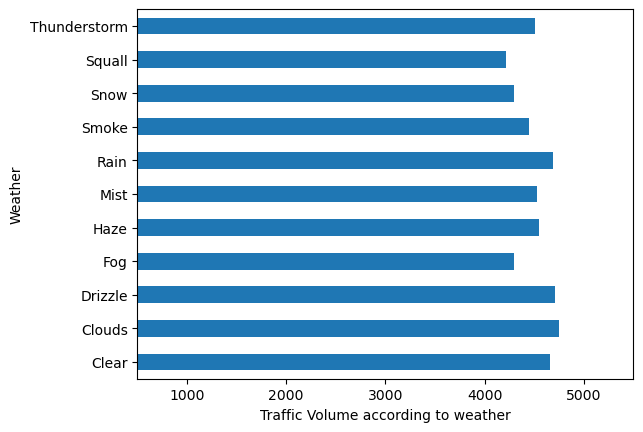

In [73]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume according to weather')
plt.ylabel('Weather')
plt.xlim([500,5500])

Text(0, 0.5, 'Weather')

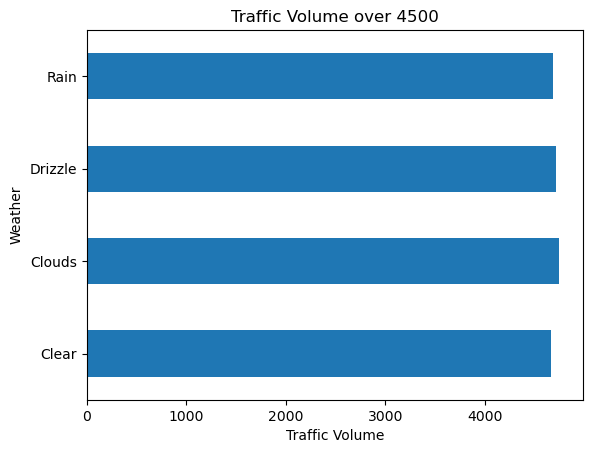

In [69]:
#We will only focus on traffic indicators with traffic volume over 4500
over_4500_weather = by_weather_main['traffic_volume'][['Clear','Clouds', 'Drizzle', 'Rain']]
over_4500_weather.plot.barh()
plt.title('Traffic Volume over 4500: Weather')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')

Here, it can be seen that the distribution of traffic is uniform. We cannot single out a single weather pattern as a clear indicator.

Text(0, 0.5, 'Weather Description')

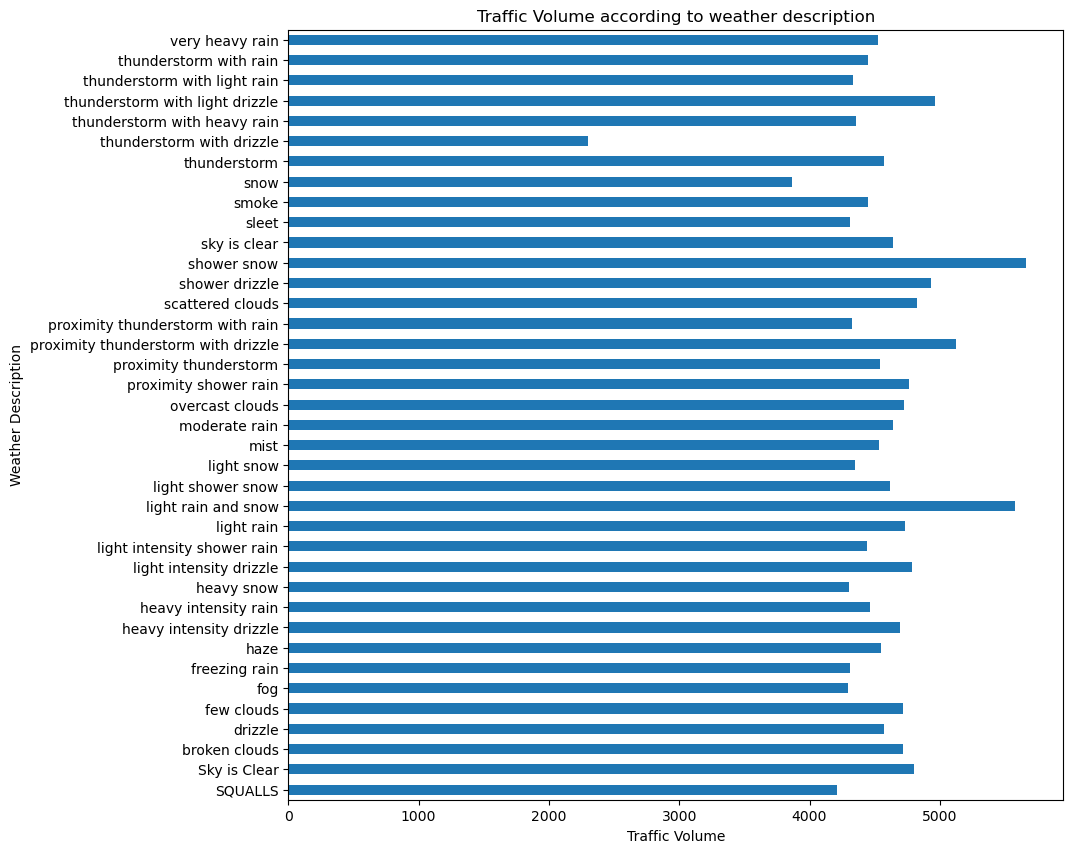

In [71]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize = (10,10))
plt.title('Traffic Volume according to weather description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')

Text(0, 0.5, 'Weather Description')

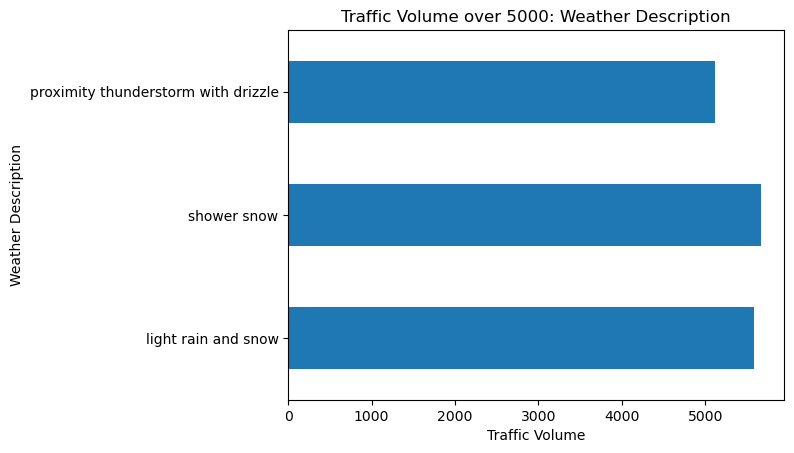

In [76]:
#Focus on traffic indicators with traffic volume over 5000

over_5000_weather_desc = by_weather_description['traffic_volume'][['light rain and snow', 'shower snow', 
                                                    'proximity thunderstorm with drizzle']]
over_5000_weather_desc.plot.barh()
plt.title('Traffic Volume over 5000: Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')

Out of these 4 indicators, it can be seen that shower snow has marginally higher traffic volume in relative to the rest. However, this is not of much signifance. Overall, the results tell us that snow, proximity thunderstorms, and light rain are indicators of heavy traffic.

## 4.Conclusion

From the analysis of the dataset, we can draw the following conclusions:
- The traffic is heavy during daytime as compared to nighttime.
- Heavy traffic is observed generally during the business days, especially around 7 a.m and 4 p.m, corresponding to the morning and evening commute.
- The traffic seems to increase significantly during an indication of bad weather, such as light rain, proximity thunderstorms with drizzle, and shower snow.